# Hyperparameters, hyperparameter search and regularisation

Last week we fit a very basic Logistic Regression model to our data in order to predict whether a patients tumour was benign or malignant on the basis of some simple physical measurements. 

We saw that even this this very simple model, that some people wouldn't even call machine learning, let alone AI, we did pretty good job, at least on the training data. However, by the time we looked at the test data, we saw that we weren't doing well enough for clinical settings. 

Today we will look at more complex models, known as Lasso, Ridge and ElastiNet. These models are similar in mathematical structure of Logistic Regression, but include methods for reducing the problem of overfitting. 

Moreoever, they will introduce us to an important new concept - _Hyperparameters_.

By the end of this excercise you should:
* Know what regularisation is and how it can reduce overfitting.
* Be able to identify hyperparameters of a model.
* Use random hyperparameter search with cross validation to select the best hyperparameter values.


## Regularised Logistic Regression

    "With four parameters I can fit an elephant, and with five I can make him wiggle his trunk"
    --- John Von Neumann

We ran into the problem of overfitting last week, when our performance on the training data was better than our preformance on the test data. Over fitting happens when your model fits too closely to the actual examples you give it, and doesn't generalise to other examples. 

It can be visualised thus:

Lets say you are trying to draw a line between the red dots and blue dots (this is basically what classification based ML does, but in many dimensions). Your line to just be a straight line - it will not be very good at distinguishing the red from blue dots. However, if it is to wiggly, it make special cases for indevidual examples, and this does not generalise well.

![](overfitting.png)

The more parameters you have in your model, the easier it is to make the line wiggly. 

Regularisation is a way of reducing the number of parameters your model actaully uses, so that it only uses the ones it really needs to. Its a mathematical formulation of occums razor that we should prefer the simpliest possible explaination of our data. 

### The loss function

Remember we said that ML models try to find the value of their parameters, so that when you plug the Xs into the equation, the Ys that come out are as close to the real Ys as possible? Well the models need a way to measure how close they are. This is call a models "loss function". The loss function measure how far away you are from the right answer. Lets not worry about how this is calculated for the moment, but just accept its existance (if you are interested, you can look up cross-entropy loss). 

### Ridge Regession

Ridge regression simply adds up all the paramter values, and then adds them to the loss. 

$$Loss = L(y, \bar{y}) + \frac{1}{C}\sum_j{|{\beta_j}|}$$

where L is the normal loss from the Logistic Regession model for the current set of parameters, $y$ is the real answer, $\bar{y}$ is the models guess at $y$, $\beta$ are the current value of the parameters, and $\lambda$ is a tuning parameter, or "Hyperparameter", that says how big the penalty for using big values of $\beta$ should be. 

If the model fits pefection (that is $L(y,\bar{y}) = 0$), but to do that it needs to use lots of really big values for $\beta$, then the loss is still high, and the machine learning algorithm will see this as a bad choice of $\beta$s. 

Conversely, the model could make a prediction using very small values for $\beta$, but if that means its not very accurate, then $L(y,\bar{y})$ will be big, and the machine learning algorithm will also see this as a bad choice of $\beta$s. 

Lets see how this works. We'll start by loading up the same dataset as before, and running the the same fitting.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# Aquire the data
breast_cancer = load_breast_cancer()
X, Y = breast_cancer["data"], breast_cancer["target"]
class_labels = breast_cancer["target_names"]
feature_labels = breast_cancer["feature_names"]

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, random_state=2)

# Note that I'm going to take only the first 100 examples, to make the task harder for the models
X_train, Y_train = X_train[:100], Y_train[:100]
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Now that we have set up the data, we can continue on to fit both standard Logistic Regression models, and a model with Ridge Regularisatoin. First the standard model:

In [2]:
# Define the model
LR_model = LogisticRegression(penalty=None, max_iter=10000)

# Fit the model
LR_model = LR_model.fit(X_train, Y_train)

# Assess the fit
y_train_pred = LR_model.predict(X_train)
y_test_pred = LR_model.predict(X_test)
print("Regular Logistic Regression")
print("---------------------------")
print(f"Accuracy on training data = {accuracy_score(Y_train, y_train_pred):.3f}")
print(f"Accuracy on test data = {accuracy_score(Y_test, y_test_pred):.3f}")

Regular Logistic Regression
---------------------------
Accuracy on training data = 1.000
Accuracy on test data = 0.942


/home/mb1ims/.local/share/mamba/envs/bis312-ml/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


We can do the same thing, using Ridge regularisation, simply by removing "penalty=None" from the call to `LogsiticRegression`.

In [3]:
# Define the model

Ridge_LR = LogisticRegression(max_iter=10000)

# fit the model
Ridge_LR = Ridge_LR.fit(X_train, Y_train)

# assess the fit
print("Ridge Regularised Logistic Regression")
print("-------------------------------------")
y_train_pred = Ridge_LR.predict(X_train)
y_test_pred = Ridge_LR.predict(X_test)
print(f"Accuracy on training data = {accuracy_score(Y_train, y_train_pred):.3f}")
print(f"Accuracy on test data = {accuracy_score(Y_test, y_test_pred):.3f}")

Ridge Regularised Logistic Regression
-------------------------------------
Accuracy on training data = 0.970
Accuracy on test data = 0.953


Note that the accuracy on the training data is worse for the regularised model than it is for the plain LR model, but we get a small improvement in performance on the test data. 

At the moment we are putting equal weight on how well the model fits the training data, and how big the values of the $\beta$s are. The parameter C dictates how the model should balance being accurate on the training data vs keeping the values of the $\beta$s small. The smaller the value of C, the more attention the model pays to the size of $\beta$, and the smaller their values will be forced to be. By default, the value of C is 1. 

C is known as a "hyperparameter" - it dictates how the model works, rather than encapsulating something about the data itself. 

How do you pick good values for hyperparameters? 

You use Cross-Validation to try out several different values for your hyperparameters, and pick the one that works the best!

Luckily for us, `scikit-learn` has a function that does this built into it (because of course it does). The model `LogisticRegressionCV` will take a list of different hyperparameter values, try them all using cross-validation, and pick the ones that work the best. In the case of the C hyperparameter, we pass a list of different values we would like it to try (we also need to tell it what values of the `l1_ratio` hyperparameter to use, but don't worry about that for now. 

In [11]:
# Specify the model
RidgeCV = LogisticRegressionCV(Cs=[1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
                               random_state=2, max_iter=10000, l1_ratios=(0.0,),
                               use_legacy_attributes=False)

# Fit the model
RidgeCV = RidgeCV.fit(X_train, Y_train)


By default `LogisticRegressionCV` does 5-fold cross-validation. That means that for each of the Cs we tested, there are 5 scores.

In [12]:
RidgeCV.scores_

array([[[0.65, 0.7 , 0.9 , 0.95, 0.95, 0.9 , 0.9 , 0.9 , 0.9 ]],

       [[0.65, 0.7 , 0.85, 0.75, 0.8 , 0.8 , 0.8 , 0.8 , 0.8 ]],

       [[0.6 , 0.7 , 0.9 , 0.95, 0.95, 0.95, 0.95, 0.95, 0.95]],

       [[0.6 , 0.65, 1.  , 0.95, 0.9 , 0.85, 0.85, 0.8 , 0.8 ]],

       [[0.6 , 0.7 , 0.9 , 1.  , 0.95, 0.95, 0.95, 0.95, 0.95]]])

We can plot each one against the value of C:

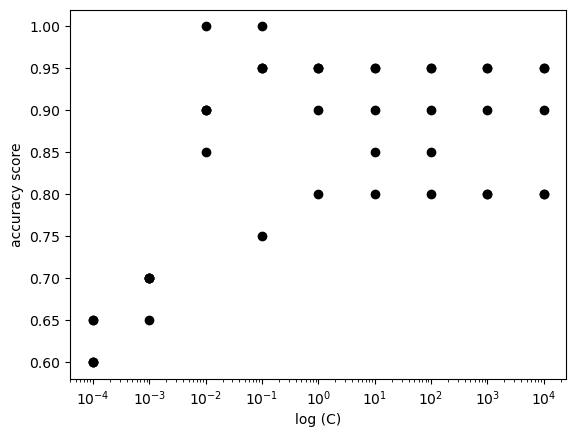

In [13]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(RidgeCV.Cs_, RidgeCV.scores_[:,0,:].T, "ko")
plt.xscale("log")
plt.xlabel( "log (C)" )
plt.ylabel( "accuracy score" )
plt.show()

This might be easier if we looked at the mean score for each value of C:

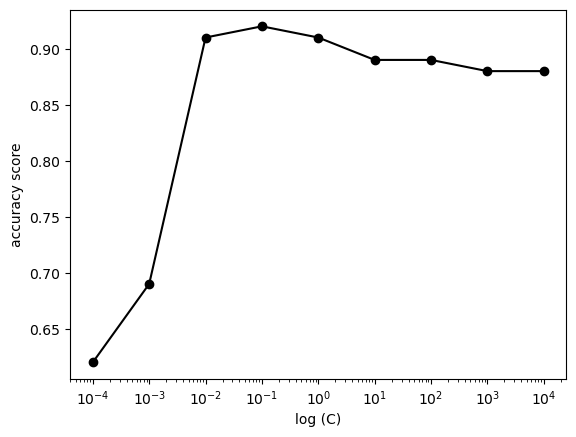

In [14]:
mean_acc = RidgeCV.scores_[:,0,:].mean(axis=0)
plt.plot(RidgeCV.Cs_, mean_acc, "ko-")
plt.xscale("log")
plt.xlabel( "log (C)" )
plt.ylabel( "accuracy score" )
plt.show()

We can see that the best mean score here is for $C=10^{-1}$ or 0.1. Indeed, if we ask RidgeCV what it is using, then it will tell us it has picked this as the best value for C. 

We can now have a look at the accuracy on the test and training data:

In [15]:
# Measure the accuracy.
y_train_pred = RidgeCV.predict(X_train)
y_test_pred = RidgeCV.predict(X_test)
print("Ridge Regularised Logistic Regression Hyperparamter search")
print("----------------------------------------------------------")
print(f"Accuracy on training data = {accuracy_score(Y_train, y_train_pred):.3f}")
print(f"Accuracy on test data = {accuracy_score(Y_test, y_test_pred):.3f}")

Ridge Regularised Logistic Regression Hyperparamter search
----------------------------------------------------------
Accuracy on training data = 0.970
Accuracy on test data = 0.977


We can see that now the model is just as accuracy on the test data as it is on the training data (perhaps even a little more, although this is probably just random noise).